<a href="https://colab.research.google.com/github/SelenaNahra/MachineLearning/blob/main/HW5Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Linear Model - Learning Rate: 0.01
Epoch 500, Loss 7.860115
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927680
Epoch 4500, Loss 2.927651
Epoch 5000, Loss 2.927648


<ipython-input-21-9420fe1e8883>:110: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  params = torch.tensor(nonlinear_initial_params, requires_grad=True)



Nonlinear Model with SGD - Learning Rate: 0.1
Nonlinear Model with SGD - Epoch 500, Loss 2.1084558963775635
Nonlinear Model with SGD - Epoch 1000, Loss 2.0907280445098877
Nonlinear Model with SGD - Epoch 1500, Loss 2.0907201766967773
Nonlinear Model with SGD - Epoch 2000, Loss 2.0907199382781982
Nonlinear Model with SGD - Epoch 2500, Loss 2.0907211303710938
Nonlinear Model with SGD - Epoch 3000, Loss 2.09071946144104
Nonlinear Model with SGD - Epoch 3500, Loss 2.0907201766967773
Nonlinear Model with SGD - Epoch 4000, Loss 2.0907199382781982
Nonlinear Model with SGD - Epoch 4500, Loss 2.0907199382781982
Nonlinear Model with SGD - Epoch 5000, Loss 2.0907201766967773

Nonlinear Model with SGD - Learning Rate: 0.01
Nonlinear Model with SGD - Epoch 500, Loss 26.266185760498047
Nonlinear Model with SGD - Epoch 1000, Loss 12.94966983795166
Nonlinear Model with SGD - Epoch 1500, Loss 6.968258380889893
Nonlinear Model with SGD - Epoch 2000, Loss 4.28157377243042
Nonlinear Model with SGD - Epoc

<ipython-input-21-9420fe1e8883>:121: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  params = torch.tensor(nonlinear_initial_params, requires_grad=True)


Nonlinear Model with Adam - Epoch 500, Loss 7.720605850219727
Nonlinear Model with Adam - Epoch 1000, Loss 2.1839568614959717
Nonlinear Model with Adam - Epoch 1500, Loss 2.1050429344177246
Nonlinear Model with Adam - Epoch 2000, Loss 2.1034278869628906
Nonlinear Model with Adam - Epoch 2500, Loss 2.1016650199890137
Nonlinear Model with Adam - Epoch 3000, Loss 2.0997159481048584
Nonlinear Model with Adam - Epoch 3500, Loss 2.0976884365081787
Nonlinear Model with Adam - Epoch 4000, Loss 2.09572434425354
Nonlinear Model with Adam - Epoch 4500, Loss 2.093984365463257
Nonlinear Model with Adam - Epoch 5000, Loss 2.0926003456115723

Nonlinear Model with Adam - Learning Rate: 0.01
Nonlinear Model with Adam - Epoch 500, Loss 57.94937515258789
Nonlinear Model with Adam - Epoch 1000, Loss 40.55136489868164
Nonlinear Model with Adam - Epoch 1500, Loss 33.974369049072266
Nonlinear Model with Adam - Epoch 2000, Loss 27.27496337890625
Nonlinear Model with Adam - Epoch 2500, Loss 20.752809524536133


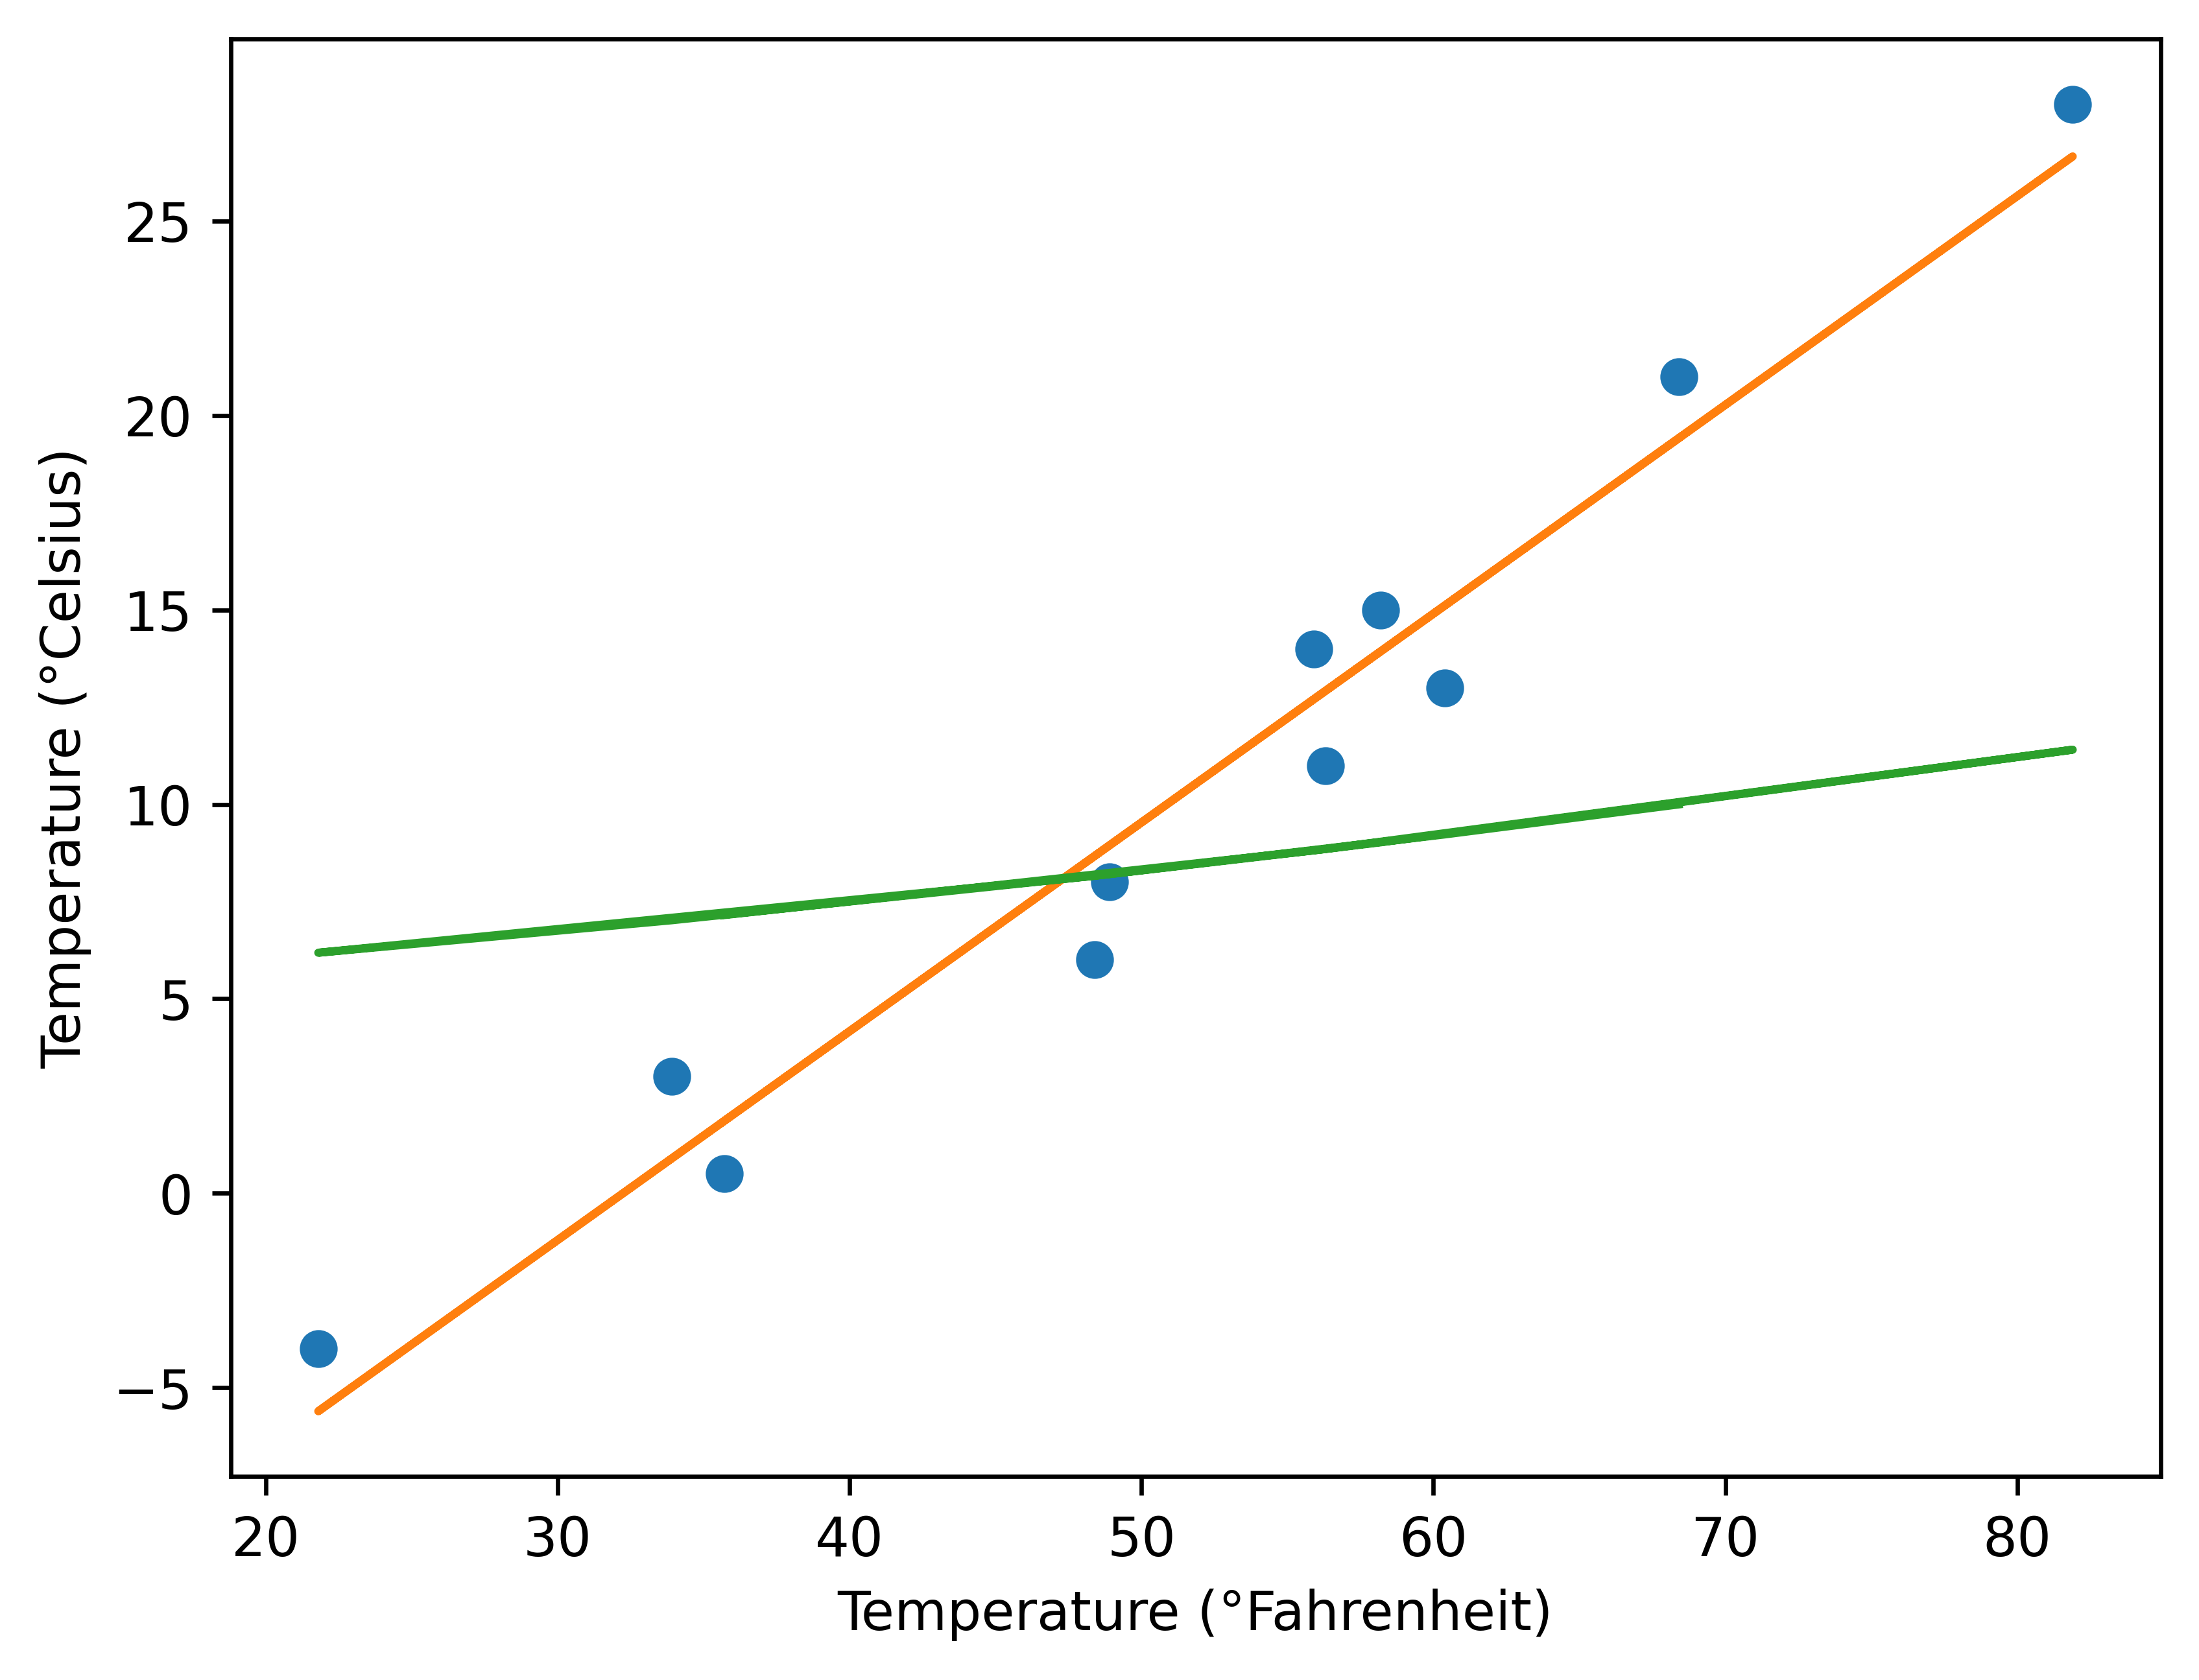

In [ ]:
import torch
import torch.optim
import matplotlib.pyplot as plt

# Data
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])

# Linear Model
def linear_model(t_u, w, b):
    return w * t_u + b

# Nonlinear Model
def nonlinear_model(t_u, w1, w2, b):
    return w2 * t_u ** 2 + w1 * t_u + b

# Loss function
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

#Grad function Linear Model
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)  # <1>
    return dsq_diffs
def dmodel_dw(t_u, w, b):
    return t_u
def dmodel_db(t_u, w, b):
    return 1.0
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])  # <1>

def linear_training_loop(n_epochs, learning_rate, params, t_u, t_c,
                  print_params=True):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        t_p = linear_model(t_u, w, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)

        params = params - learning_rate * grad

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

# Training loop for nonlinear model with SGD optimizer
def nonlinear_sgd_training_loop(n_epochs, learning_rate, params, t_u, t_c):
    optimizer = torch.optim.SGD([params], lr=learning_rate)

    for epoch in range(1, n_epochs + 1):
        t_p = nonlinear_model(t_u, *params)
        loss = loss_fn(t_p, t_c)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print(f'Nonlinear Model with SGD - Epoch {epoch}, Loss {float(loss)}')

    return params

# Training loop for nonlinear model with Adam optimizer
def nonlinear_adam_training_loop(n_epochs, learning_rate, params, t_u, t_c):
    optimizer = torch.optim.Adam([params], lr=learning_rate)

    for epoch in range(1, n_epochs + 1):
        t_p = nonlinear_model(t_u, *params)
        loss = loss_fn(t_p, t_c)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print(f'Nonlinear Model with Adam - Epoch {epoch}, Loss {float(loss)}')

    return params

# Initial parameters
nonlinear_initial_params = torch.tensor([1.0, 1.0, 0.0], dtype=torch.float32, requires_grad=True)

# Learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]

# Additional code for plotting
t_un = 0.1 * t_u
fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_c.numpy(), 'o', label='Data Points')

# Training loop for linear model with specific learning rate
t_un = 0.1 * t_u
print(f'\nLinear Model - Learning Rate: {0.01}')
trained_linear_params = linear_training_loop(5000, 0.01, torch.tensor([1.0, 0.0]), t_un, t_c, print_params=True)

# Plotting for linear model
t_p_linear = linear_model(t_un, *trained_linear_params)
label_linear = f'Linear Model - LR: {0.01}'
plt.plot(t_u.numpy(), t_p_linear.detach().numpy(), label=label_linear)

# Training loops for various configurations for nonlinear model with SGD optimizer
for lr in learning_rates:
    params = torch.tensor(nonlinear_initial_params, requires_grad=True)
    print(f'\nNonlinear Model with SGD - Learning Rate: {lr}')
    trained_params_sgd = nonlinear_sgd_training_loop(n_epochs=5000, learning_rate=lr, params=params, t_u=0.01 * t_u, t_c=t_c)

# Plotting for nonlinear model with SGD
t_p_sgd = nonlinear_model(0.01 * t_u, *trained_params_sgd)
label_sgd = f'Nonlinear Model with SGD - LR: {lr}'
plt.plot(t_u.numpy(), t_p_sgd.detach().numpy(), label=label_sgd)

# Training loops for various configurations for nonlinear model with Adam optimizer
for lr in learning_rates:
    params = torch.tensor(nonlinear_initial_params, requires_grad=True)
    print(f'\nNonlinear Model with Adam - Learning Rate: {lr}')
    trained_params_adam = nonlinear_adam_training_loop(n_epochs=5000, learning_rate=lr, params=params, t_u=0.01 * t_u, t_c=t_c)
